In [424]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Data Handling
First thing is to read the data, analyse it, select features, and prepare it for training by scaling and splitting it.

In [425]:
df = pd.read_csv('Data/heart.csv')
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


## Summarise the data

Using the describe method to get a summary of the data to identify to perform Heart diagnosis, determine if there are missing values and get a sense of the scale of values in different columns.

In [426]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [427]:
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [428]:
df.drop(columns=['id','dataset'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)


## data encoding

In [429]:
print(df.head(2))

   age   sex              cp  trestbps   chol    fbs         restecg  thalch  \
0   63  Male  typical angina     145.0  233.0   True  lv hypertrophy   150.0   
1   67  Male    asymptomatic     160.0  286.0  False  lv hypertrophy   108.0   

   exang  oldpeak        slope   ca          thal  num  
0  False      2.3  downsloping  0.0  fixed defect    0  
1   True      1.5         flat  3.0        normal    1  


In [430]:
encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['cp'] = encoder.fit_transform(df['cp'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['fbs'] = encoder.fit_transform(df['fbs'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['restecg'] = encoder.fit_transform(df['restecg'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['exang'] = encoder.fit_transform(df['exang'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['slope'] = encoder.fit_transform(df['slope'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['thal'] = encoder.fit_transform(df['thal'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'Female': 0, 'Male': 1}
{'asymptomatic': 0, 'atypical angina': 1, 'non-anginal': 2, 'typical angina': 3}
{False: 0, True: 1}
{'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}
{False: 0, True: 1}
{'downsloping': 0, 'flat': 1, 'upsloping': 2}
{'fixed defect': 0, 'normal': 1, 'reversable defect': 2}


### Deciding on important features
Deciding on which features are most important to the target our main concern "Heart Disease" by plotting a correlation matrix. First we list all the columns in the dataset. Then we create a correlation matrix and lastly visualise the correlations using a heatmap.

In [431]:
columns = list(df.columns)
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

### Creating the correlation matrix


In [432]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.093693,-0.060833,0.286149,0.199258,0.132752,-0.115722,-0.384176,0.092506,0.195929,-0.157545,0.362764,0.059228,0.223498
sex,-0.093693,1.000000,-0.047326,-0.065209,-0.202500,0.036869,-0.062598,-0.067820,0.148956,0.108107,-0.036213,0.088292,0.217901,0.281912
cp,-0.060833,-0.047326,1.000000,0.038374,-0.060095,0.121552,0.036252,0.301240,-0.385983,-0.140811,0.104842,-0.217937,-0.166515,-0.429147
trestbps,0.286149,-0.065209,0.038374,1.000000,0.134240,0.179791,-0.120111,-0.053320,0.067843,0.191144,-0.121500,0.096641,0.061708,0.153849
chol,0.199258,-0.202500,-0.060095,0.134240,1.000000,0.016939,-0.152597,0.014894,0.042846,0.033964,0.015971,0.121907,0.066443,0.067350
fbs,0.132752,0.036869,0.121552,0.179791,0.016939,1.000000,-0.083047,-0.002929,-0.004809,0.007252,-0.045958,0.153718,-0.020172,0.000192
restecg,-0.115722,-0.062598,0.036252,-0.120111,-0.152597,-0.083047,1.000000,0.017245,-0.053871,-0.049834,0.083082,-0.112497,0.000182,-0.127437
thalch,-0.384176,-0.067820,0.301240,-0.053320,0.014894,-0.002929,0.017245,1.000000,-0.394229,-0.348089,0.391992,-0.256831,-0.124510,-0.430108
exang,0.092506,0.148956,-0.385983,0.067843,0.042846,-0.004809,-0.053871,-0.394229,1.000000,0.290835,-0.254650,0.140089,0.233616,0.427123
oldpeak,0.195929,0.108107,-0.140811,0.191144,0.033964,0.007252,-0.049834,-0.348089,0.290835,1.000000,-0.579596,0.291958,0.214868,0.424947


### Plotting a heatmap
It seems there is no strong correlation between potability and individual features. There is need to explore data further to see if that is the case.

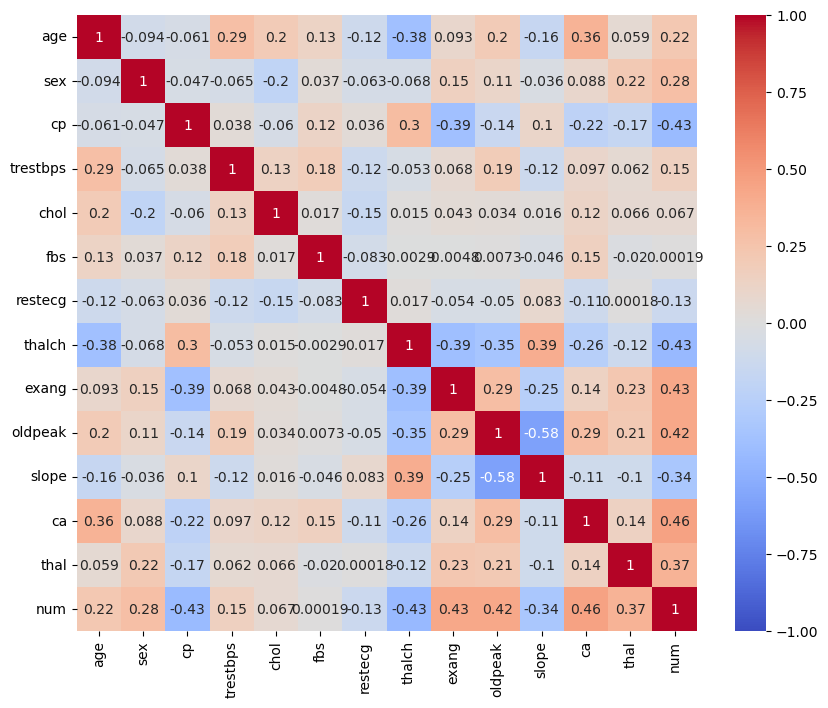

In [433]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True,)
plt.show()

### Drawing scatter plots between different features
Trying to determine if there are obvious trends in the way the data is spread in order to determine the Heart disease occurance.

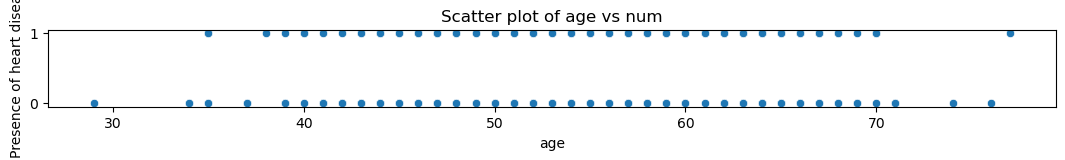

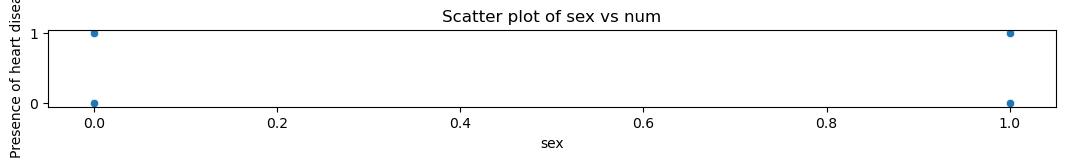

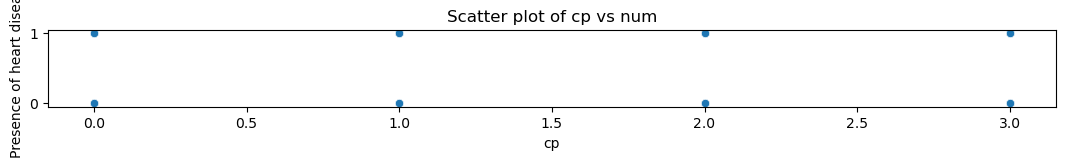

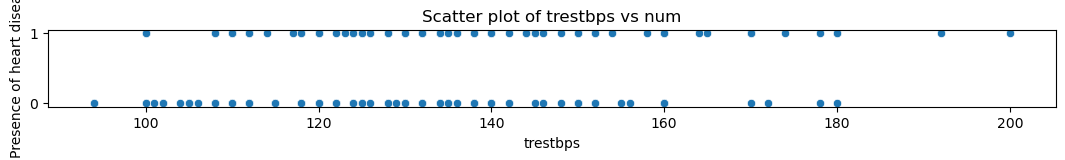

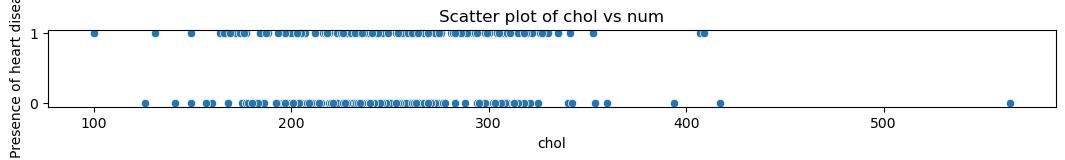

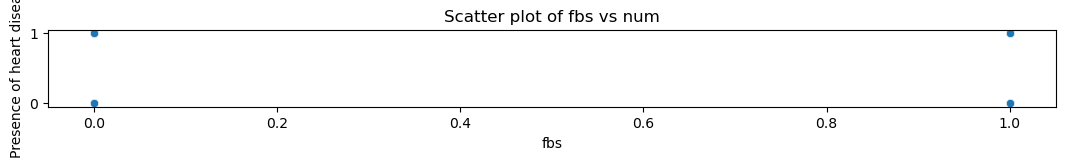

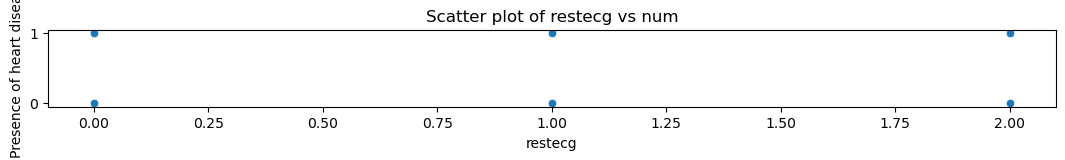

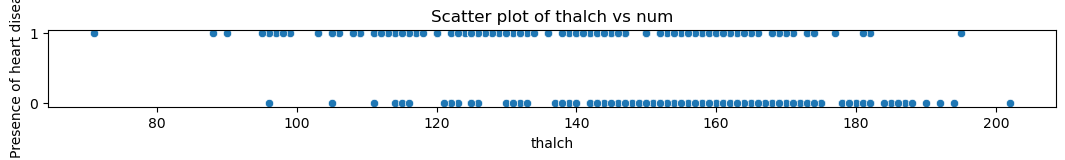

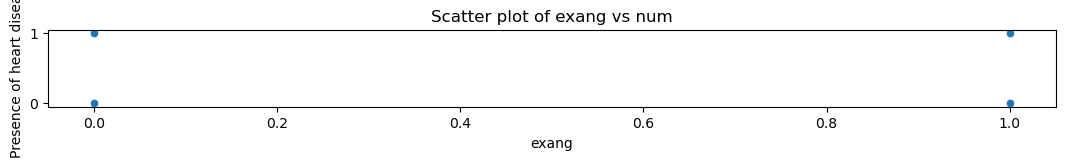

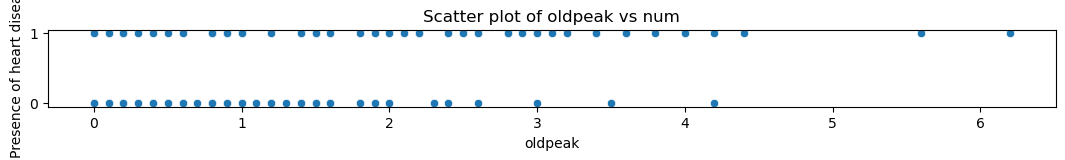

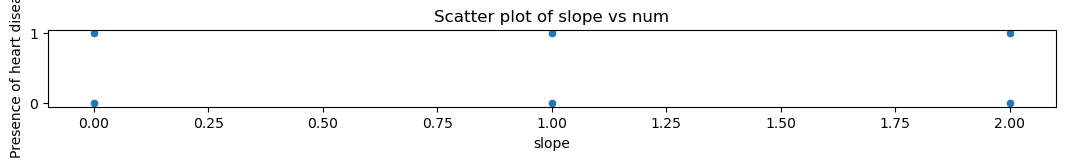

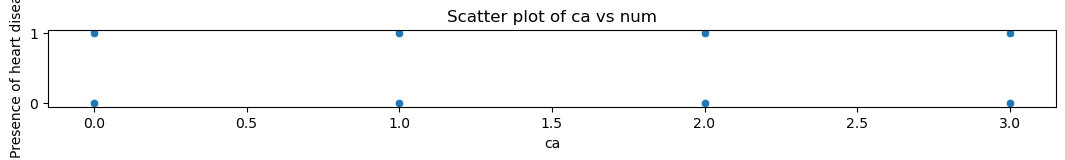

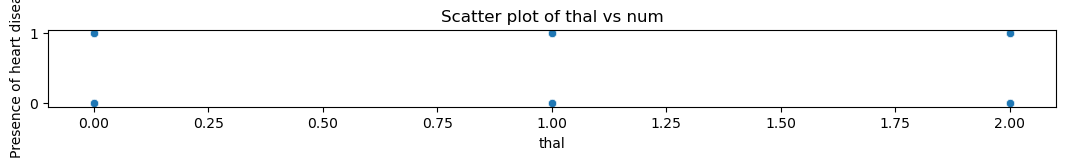

In [434]:
# Create a list of columns to plot by copying the columns list
# And removing the Potability column
columns_to_plot = columns.copy()
columns_to_plot.remove('num')

for column in columns_to_plot:
  plt.figure(figsize=(13, 1))
  sns.scatterplot(x=df[column], y=df['num'])
  plt.title(f'Scatter plot of {column} vs num')
  plt.xlabel(column)
  plt.ylabel('Presence of heart disease')
  plt.show()

### Conclusion

The implementation of AI models for heart disease diagnosis demonstrates significant potential for improving diagnostic accuracy and efficiency. As shown by the heatmap, a medium correlation was observed between various features and the target variable, highlighting the relationships that inform our model's predictions. Additionally, the scatterplots provided further insights into the distribution of data points, illustrating how different features interact with one another. By harnessing these visualizations alongside advanced machine learning techniques, we aim to revolutionize the diagnostic process, ultimately leading to better patient outcomes and more informed healthcare decisions.

### Preparing the data for training
To prepare the data for training, we are going to scale the data, split the data into features and target, and then split it further into training and testing data.

In [435]:
x = df.drop(columns=['num'])
y = df['num']

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

print(x.head(5))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.940446  0.687682  1.987204  0.749760 -0.262867  2.439977 -0.999250   
1  1.384143  0.687682 -0.920662  1.596354  0.747722 -0.409840 -0.999250   
2  1.384143  0.687682 -0.920662 -0.661231 -0.339138 -0.409840 -0.999250   
3 -1.943588  0.687682  1.017915 -0.096835  0.061285 -0.409840  0.903781   
4 -1.499891 -1.454161  0.048627 -0.096835 -0.815830 -0.409840 -0.999250   

     thalch     exang   oldpeak     slope        ca      thal  
0  0.029124 -0.703562  1.069475 -2.264299 -0.718306 -2.276554  
1 -1.790447  1.421338  0.380309 -0.640737  2.487269 -0.566279  
2 -0.880662  1.421338  1.327912 -0.640737  1.418744  1.143997  
3  1.632079 -0.703562  2.103224 -2.264299 -0.718306 -0.566279  
4  0.982232 -0.703562  0.294163  0.982825 -0.718306 -0.566279  


In [436]:
print(x_train.shape)
print(y_train.shape)

(239, 13)
(239,)


# model architecture

## Making the Vanilla Model

Training a model without regularisation or optimisation.

## Defining the model
1. Create the model as a Sequential model.

2.   Add layers to the model:


*   Start by adding a dense layer with 16 units, ReLU activation function, and specify the input dimension to match the number of features in the training data.
*   Add another dense layer with 32 units, ReLU activation function, and specify the input dimension to match the number of features in the training data.
*   Add another dense layer with 1 unit and a sigmoid activation function. This layer will output the probability of water potability.



In [437]:
from keras.models import Sequential
from keras.layers import Dense


model1 = Sequential()
model1.add(Dense(128, activation="relu", input_shape=(x_train.shape[1],)))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))
model1.summary() 


model1.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy','precision','recall'])


Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_320 (Dense)           (None, 128)               1792      
                                                                 
 dense_321 (Dense)           (None, 64)                8256      
                                                                 
 dense_322 (Dense)           (None, 64)                4160      
                                                                 
 dense_323 (Dense)           (None, 32)                2080      
                                                                 
 dense_324 (Dense)           (None, 1)                 33        
                                                                 
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


3.   Compile the model:

*   Compile the model using the `adamax` optimizer.
*   Specify the loss function as `binary_crossentropy` since this is a binary classification problem.
*   Include `accuracy` as a metric to track during training.
### Icluding  : Training the model
1.   Train the model:

*   Use the `fit` method to train the model.
*   Provide the training data (`X_train` and `Y_train`).
*   Set the number of epochs to 100.
*   Specify the batch size as 32.

In [438]:
model.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adamax"
)

model_train = model.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)

model1.save("saved_models/model1.keras")

Epoch 1/100
6/6 [==============================] - 2s 103ms/step - loss: 0.0103 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.0894 - val_accuracy: 0.8125 - val_precision: 0.6667 - val_recall: 0.8750
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0058 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1061 - val_accuracy: 0.8125 - val_precision: 0.6667 - val_recall: 0.8750
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0050 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1566 - val_accuracy: 0.7917 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1589 - val_accuracy: 0.7917 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0037 - accuracy: 1.0000 - precision: 

## optmisation

In [439]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1


model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(x_train.shape[1],), kernel_regularizer=l1(l1=0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation="relu", kernel_regularizer=l1(l1=0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation="relu",  kernel_regularizer=l1(l1=0.001)))
model.add(Dropout(0.4))
model.add(Dense(32, activation="tanh",  kernel_regularizer=l1(l1=0.001)))
model.add(Dropout(0.4))
model.add(Dense(1, activation="sigmoid"))
model.summary() 


model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy','precision','recall'])


Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_325 (Dense)           (None, 128)               1792      
                                                                 
 dropout_104 (Dropout)       (None, 128)               0         
                                                                 
 dense_326 (Dense)           (None, 64)                8256      
                                                                 
 dropout_105 (Dropout)       (None, 64)                0         
                                                                 
 dense_327 (Dense)           (None, 64)                4160      
                                                                 
 dropout_106 (Dropout)       (None, 64)                0         
                                                                 
 dense_328 (Dense)           (None, 32)              

In [440]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=15, mode='auto')


model.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer=Adam(learning_rate=0.005)
)

model_train = model.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop]
)

Epoch 1/100
6/6 [==============================] - 2s 111ms/step - loss: 2.2256 - accuracy: 0.6021 - precision: 0.5833 - recall: 0.7857 - val_loss: 2.1213 - val_accuracy: 0.7083 - val_precision: 0.5357 - val_recall: 0.9375
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.9454 - accuracy: 0.7749 - precision: 0.7570 - recall: 0.8265 - val_loss: 1.8342 - val_accuracy: 0.7708 - val_precision: 0.6316 - val_recall: 0.7500
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 1.7646 - accuracy: 0.8168 - precision: 0.8462 - recall: 0.7857 - val_loss: 1.7921 - val_accuracy: 0.7708 - val_precision: 0.6316 - val_recall: 0.7500
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 1.6769 - accuracy: 0.8482 - precision: 0.8710 - recall: 0.8265 - val_loss: 1.7103 - val_accuracy: 0.7917 - val_precision: 0.6667 - val_recall: 0.7500
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 1.5326 - accuracy: 0.8429 - precision: 

### Addition of an L1 Regularization to the Model

To prevent overfitting and improve generalization, we will implement the architecture used previously but with L1 regularization. We will also add early stopping to find the best weights and dropout to prevent overfitting.

#### steps taken

-   Defining the model with L1 regularization and dropout between layers.
-   Training the model with early stopping

In [441]:
from keras.layers import BatchNormalization
model2 = Sequential()
model2.add(Dense(128, activation="relu", input_shape=(x_train.shape[1],), kernel_regularizer=l1(l1=0.001)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(32, activation="relu", kernel_regularizer=l1(l1=0.001)))
model2.add(Dense(64, activation="relu", kernel_regularizer=l1(l1=0.001)))
model2.add(Dense(1, activation="sigmoid", kernel_regularizer=l1(l1=0.001)))


model2.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer=Adam(learning_rate=0.001)
)

model_train = model2.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop]
)

model2.save("saved_models/model2.keras")

Epoch 1/100
6/6 [==============================] - 3s 215ms/step - loss: 1.4355 - accuracy: 0.6387 - precision: 0.6014 - recall: 0.8776 - val_loss: 1.4874 - val_accuracy: 0.6667 - val_precision: 0.5000 - val_recall: 0.8750
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 1.3369 - accuracy: 0.7958 - precision: 0.7810 - recall: 0.8367 - val_loss: 1.4389 - val_accuracy: 0.7292 - val_precision: 0.5789 - val_recall: 0.6875
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 1.2450 - accuracy: 0.8063 - precision: 0.8352 - recall: 0.7755 - val_loss: 1.3965 - val_accuracy: 0.7708 - val_precision: 0.6471 - val_recall: 0.6875
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 1.2007 - accuracy: 0.8639 - precision: 0.9091 - recall: 0.8163 - val_loss: 1.3649 - val_accuracy: 0.7917 - val_precision: 0.6875 - val_recall: 0.6875
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1452 - accuracy: 0.8743 - precision: 

## Findings : Error Analysis

In this section we will compare the different models and how they perform so as to decide on the best model to use

   - **Performance Metrics Vanilla Model**:
     - Loss: 0.0045
     - Accuracy: 1.0000
     - Precision: 1.0000
     - Recall: 1.0000
     - Validation Loss: 1.4946
 - **Performance Metrics Optimized model**:
     - Loss: 0.6184
     - Accuracy: 0.9791
     - Precision: 0.9796
     - Recall: 0.9796
     - Validation Loss: 1.0764

### Error Analysis

In this section, we will analyze the errors made by our models to gain insights into their performance and identify areas for improvement.

1. **Confusion Matrix**: 
   We will visualize the confusion matrix for both models to understand the true positives, false positives, true negatives, and false negatives.

2/2 [==============================] - 0s 0s/step


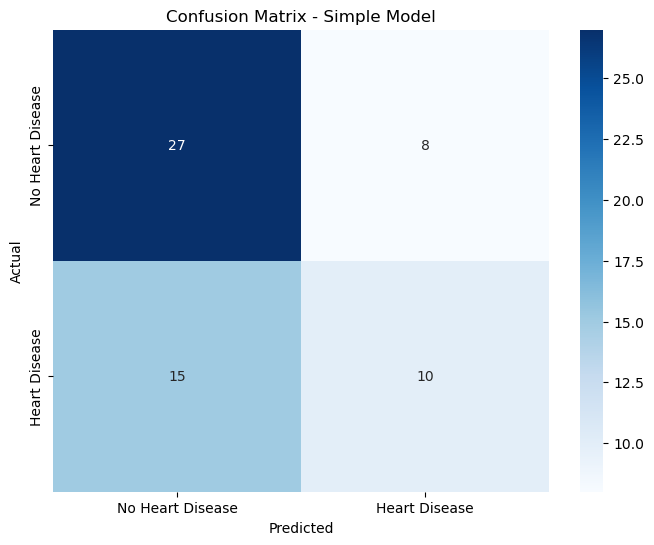

In [442]:
y_pred_simple = model1.predict(x_test)
y_pred_simple = (y_pred_simple > 0.5).astype(int)
cm_simple = confusion_matrix(y_test, y_pred_simple)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_simple, annot=True, fmt='d', cmap='Blues',
xticklabels=['No Heart Disease', 'Heart Disease'],
yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Simple Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2/2 [==============================] - 0s 6ms/step


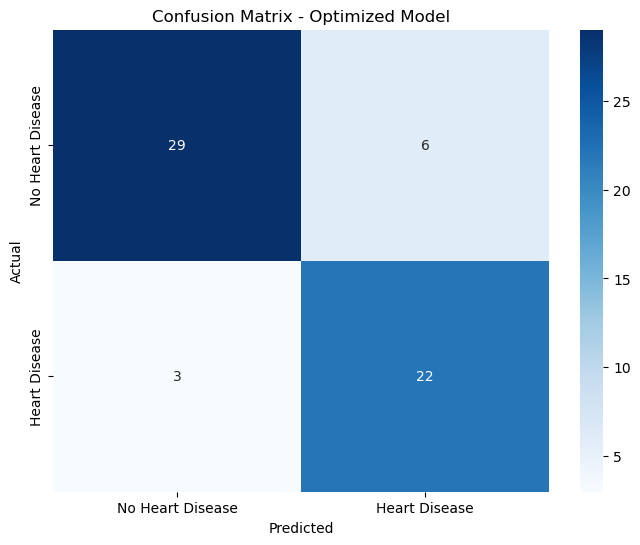

In [443]:
y_pred_optimized = model2.predict(x_test)
y_pred_optimized = (y_pred_optimized > 0.5).astype(int)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues',
xticklabels=['No Heart Disease', 'Heart Disease'],
yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Optimized Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


2. **Error Analysis**: 
   We will analyze the misclassified instances to understand the characteristics of the samples that were incorrectly predicted.


### Identify & display misclassified instances for the simple model  

In [445]:
# Ensure y_test is a NumPy array
y_test_values = y_test.values  # Convert to NumPy array if it's a DataFrame/Series

# Generate predictions using the trained model
y_pred_simple = model.predict(x_test)
y_pred_simple = (y_pred_simple > 0.5).astype(int).flatten()  # Flatten to ensure it's 1D

# Identify misclassified instances
misclassified_simple = x_test[y_test_values != y_pred_simple]  # Use boolean indexing
misclassified_simple = misclassified_simple.copy()  # Create a copy to avoid SettingWithCopyWarning
misclassified_simple['Actual'] = y_test_values[y_test_values != y_pred_simple]  # Add actual values
misclassified_simple['Predicted'] = y_pred_simple[y_test_values != y_pred_simple]  # Add predicted values

# Display misclassified instances
print("Misclassified Instances - Simple Model:")
print(misclassified_simple)

2/2 [==============================] - 0s 7ms/step
Misclassified Instances - Simple Model:
          age       sex        cp  trestbps      chol      fbs   restecg  \
164  0.274900  0.687682 -0.920662  0.016045 -0.758627 -0.40984  0.903781   
57  -1.499891  0.687682 -0.920662 -1.225627 -1.425997 -0.40984 -0.999250   
140  0.496748  0.687682  1.987204  2.160751  0.785858 -0.40984 -0.999250   
247  0.274900  0.687682 -0.920662 -1.225627 -0.873034 -0.40984  0.903781   
33   0.496748  0.687682 -0.920662  0.185364 -0.243799 -0.40984  0.903781   
113  0.829521 -1.454161  1.017915 -0.096835  0.309165 -0.40984  0.903781   
144 -0.834344  0.687682  1.017915 -1.338506 -0.072189 -0.40984  0.903781   
59  -0.390647  0.687682  1.987204 -0.379033 -0.644221 -0.40984 -0.999250   

       thalch     exang   oldpeak     slope        ca      thal  Actual  \
164  0.808940  1.421338 -0.911877  0.982825 -0.718306  1.143997       0   
57   0.375708 -0.703562 -0.911877  0.982825 -0.718306  1.143997       1   